In [1]:
import numpy as np
import matplotlib.pyplot as plt


Definindo o novo vetor de estado, incluindo a aceleração em x e y. Desse modo, o vetor de estado passa a ser 6x1.

1. **Vetor de estado**
$\begin{align}
    x_{k}=\begin{bmatrix}
    x \\
    y\\
    \dot{x} \\
    \dot{y} \\
    \ddot{x} \\
    \ddot{y} \\
    \end{bmatrix} = \begin{bmatrix}
    \text{Position X} \\
    \text{Position Y}\\
    \text{Velocity X}\\
    \text{Velocity Y} \\
    \text{Acceleration X}\\
    \text{Acceleration Y}
    \end{bmatrix} 
    \end{align}
   $

In [2]:
x = np.matrix([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]).T
print(x, x.shape)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] (6, 1)


A matriz de covariância P, que passa a ser 6x6:

2. **Incerteza inicial** $P_{0}$
   
   $\begin{align}
   P_{0} = \begin{bmatrix}\sigma^2_x & 0 & 0 & 0  & 0 & 0\\ 0 & \sigma^2_y & 0 & 0 & 0 & 0 \\ 0 & 0 & \sigma^2_{\dot x} & 0 & 0 & 0 \\ 0 & 0 & 0 & \sigma^2_{\dot y} & 0 & 0 \\ 0 &0 & 0 & 0 & \sigma^2_{\ddot x} & 0 \\ 0 & 0 & 0 & 0 & 0 & \sigma^2_{\ddot y}\end{bmatrix}
   \end{align}
   $

   Sendo $\sigma$ o desvio padrão.

In [3]:
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0])
print(P, P.shape)

[[1000.    0.    0.    0.    0.    0.]
 [   0. 1000.    0.    0.    0.    0.]
 [   0.    0. 1000.    0.    0.    0.]
 [   0.    0.    0. 1000.    0.    0.]
 [   0.    0.    0.    0. 1000.    0.]
 [   0.    0.    0.    0.    0. 1000.]] (6, 6)


A matriz A adaptada de acordo com a dinâmica do sistema, seguindo o movimento retilíneo uniformemente variado:

3. **Matriz $A$**


    $\begin{align}
    x_{k+1} = \begin{bmatrix}1 & 0 & \Delta t & 0 & 0.005 & 0 \\ 0 & 1 & 0 & \Delta t & 0 & 0.005 \\ 0 & 0 & 1 & 0 & \Delta t & 0 \\ 0 & 0 & 0 & 1 & 0 & \Delta t \\ 0 & 0 & 0 &0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ \dot x \\ \dot y \\ \ddot x \\ \ddot y\end{bmatrix}_{k}
    \end{align}
    $




In [4]:
dt = 0.1 # Time Step between Filter Steps

A = np.matrix([[1.0, 0.0, dt, 0.0, (0.5*(dt**2)), 0.0],
              [0.0, 1.0, 0.0, dt, 0.0, (0.5*(dt**2))],
              [0.0, 0.0, 1.0, 0.0, dt, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(A, A.shape)

[[1.    0.    0.1   0.    0.005 0.   ]
 [0.    1.    0.    0.1   0.    0.005]
 [0.    0.    1.    0.    0.1   0.   ]
 [0.    0.    0.    1.    0.    0.1  ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]] (6, 6)


A matriz Q, incluindo a perturbação inicial da arrancada.

4. **Matriz de ruído do processo $Q$**


   $\begin{align}
   Q = \begin{bmatrix}
     \sigma_{x}^2 & 0 & \sigma_{x \dot x} & 0  & \sigma_{x \ddot x} & 0 \\
    0 & \sigma_{y}^2 & 0 & \sigma_{y \dot y} & 0 & \sigma_{y \ddot y} \\
     \sigma_{\dot x x} & 0 & \sigma_{\dot x}^2 & 0 & \sigma_{\dot x \ddot x} & 0 \\
    0 & \sigma_{\dot y y} & 0 & \sigma_{\dot y}^2 & 0 & \sigma{\dot y \ddot y} \\
     \sigma_{\ddot x x} & 0 & \sigma_{\ddot x \dot x} & 0 & \sigma_{\ddot x}^2 & 0 \\
    0 & \sigma_{\ddot y y} & 0 & \sigma_{\ddot y \dot y} & 0 & \sigma_{\ddot y}^2 \\
   \end{bmatrix} \cdot \sigma_{a}
   \end{align}
   $


In [5]:
sv = 8.8

Q = np.matrix([[(dt**6)/36, 0, (dt**5)/12, 0, (dt**4)/6, 0.0],
               [0, (dt**6)/36, 0, (dt**5)/12, 0.0, (dt**4)/6],
               [(dt**5)/12, 0, (dt**4)/4, 0, (dt**3)/2, 0.0],
               [0, (dt**5)/12, 0, (dt**4)/4, 0.0, (dt**3)/2],
               [(dt**4)/6, 0, (dt**3)/2, 0, (dt**2), 0.0],
               [0, (dt**4)/6, 0, (dt**3)/2, 0.0, (dt**2)]]) * sv**2
print(Q, Q.shape)

[[2.15111111e-06 0.00000000e+00 6.45333333e-05 0.00000000e+00
  1.29066667e-03 0.00000000e+00]
 [0.00000000e+00 2.15111111e-06 0.00000000e+00 6.45333333e-05
  0.00000000e+00 1.29066667e-03]
 [6.45333333e-05 0.00000000e+00 1.93600000e-03 0.00000000e+00
  3.87200000e-02 0.00000000e+00]
 [0.00000000e+00 6.45333333e-05 0.00000000e+00 1.93600000e-03
  0.00000000e+00 3.87200000e-02]
 [1.29066667e-03 0.00000000e+00 3.87200000e-02 0.00000000e+00
  7.74400000e-01 0.00000000e+00]
 [0.00000000e+00 1.29066667e-03 0.00000000e+00 3.87200000e-02
  0.00000000e+00 7.74400000e-01]] (6, 6)


A nova matriz de observação H, com base no acelerômetro ao invés do tacômetro:

5. **Matriz de observação**
$\begin{align}
   H = \begin{bmatrix}0& 0 & 0 & 0 & 1 & 0 \\ 0& 0 & 0 & 0 & 0 & 1\end{bmatrix}
   \end{align}
   $

In [6]:
H = np.matrix([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(H, H.shape)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (2, 6)


A matriz de covariância R se manteve.

6. **Matriz de ruído do movimento** $R$

    $\begin{align}
    R = \begin{bmatrix}\sigma^2_{\dot x} & 0 \\ 0 & \sigma^2_{\dot y} \end{bmatrix}
    \end{align}
    $

In [7]:
ra = 10.0**2

R = np.matrix([[ra, 0.0],
              [0.0, ra]])
print(R, R.shape)

[[100.   0.]
 [  0. 100.]] (2, 2)


In [8]:
I = np.eye(6) # 6 x 6 Identity matrix
print(I, I.shape)

m = 200 # Measurements
vx= 20 # in X
vy= 10 # in Y

mx = np.array(vx+np.random.randn(m))
my = np.array(vy+np.random.randn(m))

measurements = np.vstack((mx,my))

print(measurements.shape)

print('Standard Deviation of Acceleration Measurements=%.2f' % np.std(mx))
print('You assumed %.2f in R.' % R[0,0])

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (6, 6)
(2, 200)
Standard Deviation of Acceleration Measurements=0.93
You assumed 100.00 in R.


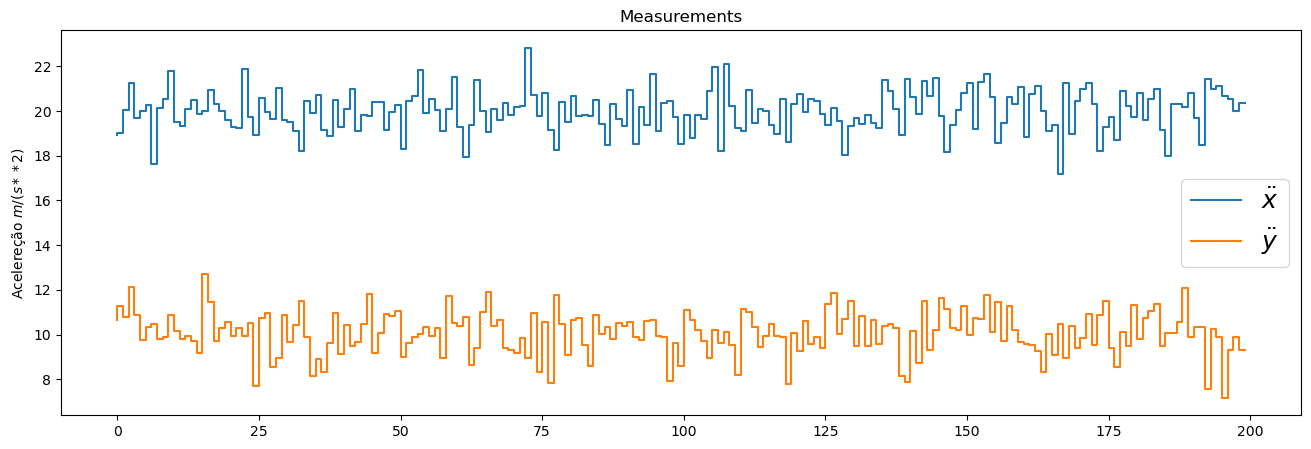

In [9]:
fig = plt.figure(figsize=(16,5))

plt.step(range(m),mx, label='$\ddot x$')
plt.step(range(m),my, label='$\ddot y$')
plt.ylabel(r'Acelereção $m/(s**2)$')
plt.title('Measurements')
plt.legend(loc='best',prop={'size':18})

In [10]:
# Preallocation for Plotting
xt = []
yt = []
dxt= []
dyt= []
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Rdx= []
Rdy= []
Kx = []
Ky = []
Kdx= []
Kdy= []


def savestates(x, Z, P, R, K):
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pdx.append(float(P[2,2]))
    Pdy.append(float(P[3,3]))
    Rdx.append(float(R[0,0]))
    Rdy.append(float(R[1,1]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,0]))

In [11]:
posicao_x = []
velocidade_x = []
aceleracao_x = []
posicao_y = []
velocidade_y = []
aceleracao_y = []

for n in range(len(measurements[0])):
 
    # Time Update (Prediction)
    # ========================
    # Project the state ahead
    x = A*x
    
    # Project the error covariance ahead
    P = A*P*A.T + Q
    
    
    # Measurement Update (Correction)
    # ===============================
    # Compute the Kalman Gain
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)

    
    # Update the estimate via z
    Z = measurements[:,n].reshape(2,1)
    y = Z - (H*x)                            # Innovation or Residual
    x = x + (K*y)
    
    posicao_x.append(x[0][0])
    velocidade_x.append(x[2][0])
    aceleracao_x.append(x[4][0])
    posicao_y.append(x[1][0])
    velocidade_y.append(x[3][0])
    aceleracao_y.append(x[5][0])
    # Update the error covariance
    P = (I - (K*H))*P
    
    
    
    # Save states (for Plotting)
    savestates(x, Z, P, R, K)

In [12]:
X_axis = np.arange(len(posicao_x))
X_axis

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

(-199.16762707779137, 4184.410378562083, -100.78576880585332, 2117.5649925719)

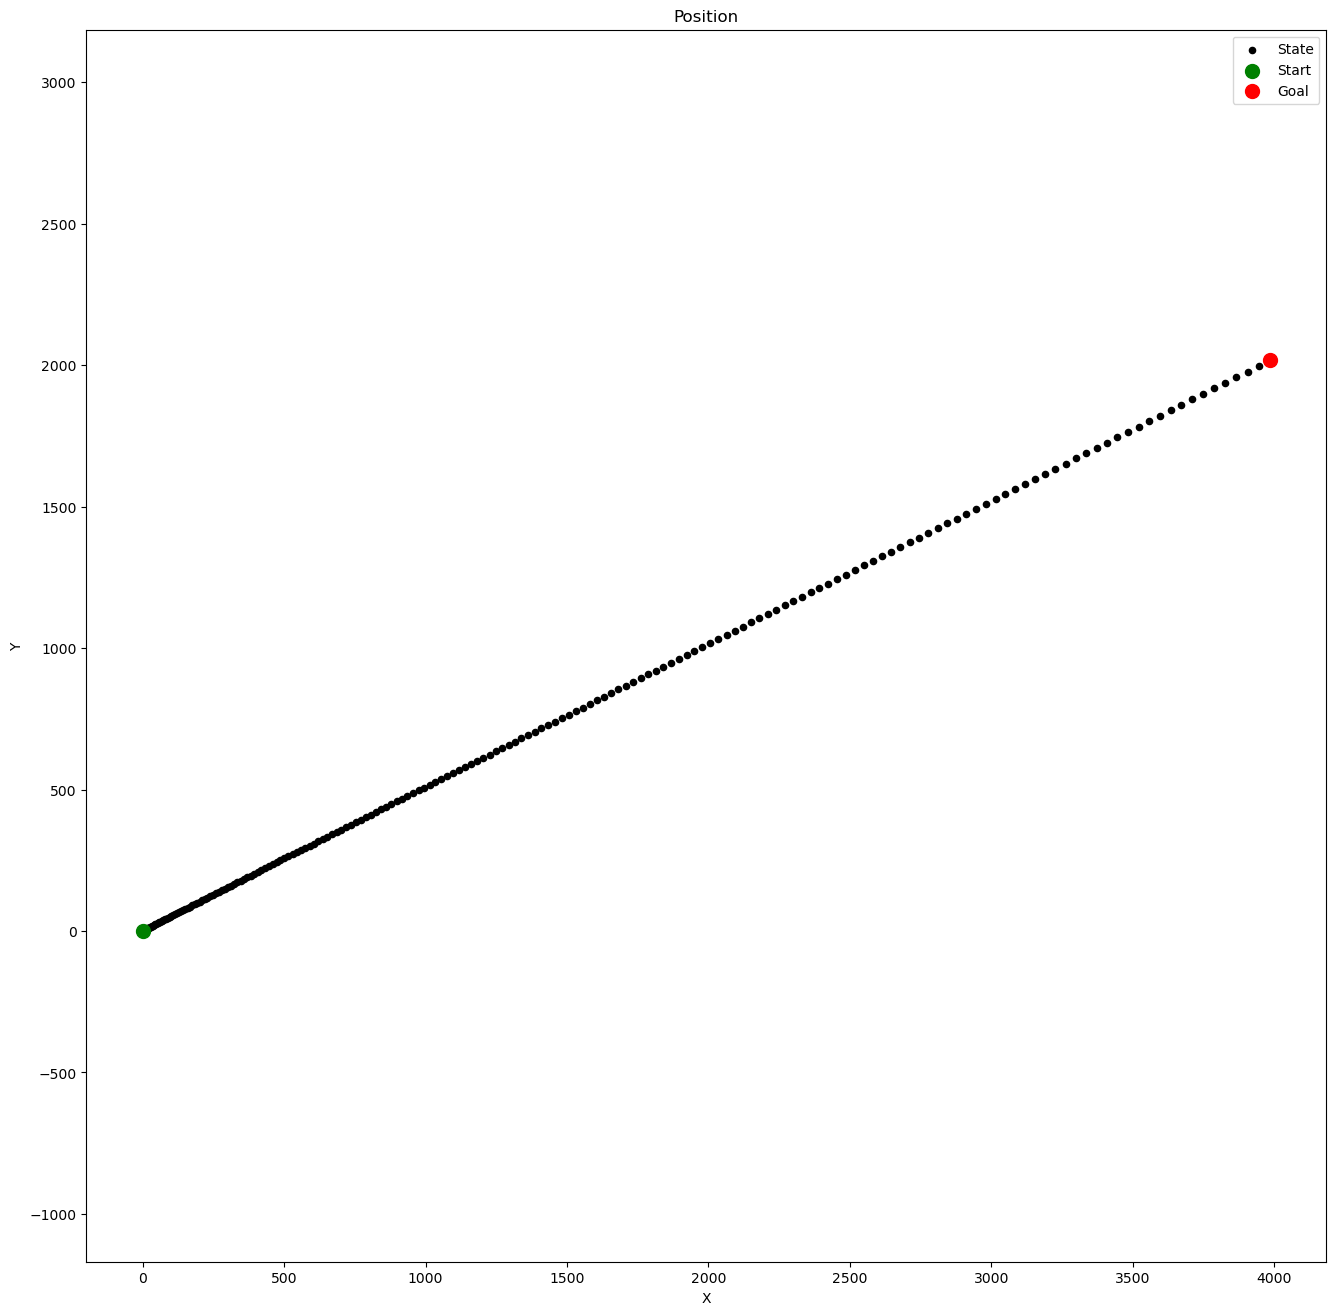

In [13]:
X_axis = [x*10 for x in X_axis]
fig = plt.figure(figsize=(16,16))
plt.scatter(xt,yt, s=20, label='State', c='k')
plt.scatter(xt[0],yt[0], s=100, label='Start', c='g')
plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position')
plt.legend(loc='best')
plt.axis('equal')

**PLOT VETOR DE ESTADO:**

(-99.5, 2089.5, 17.03539641878157, 20.493781007231973)

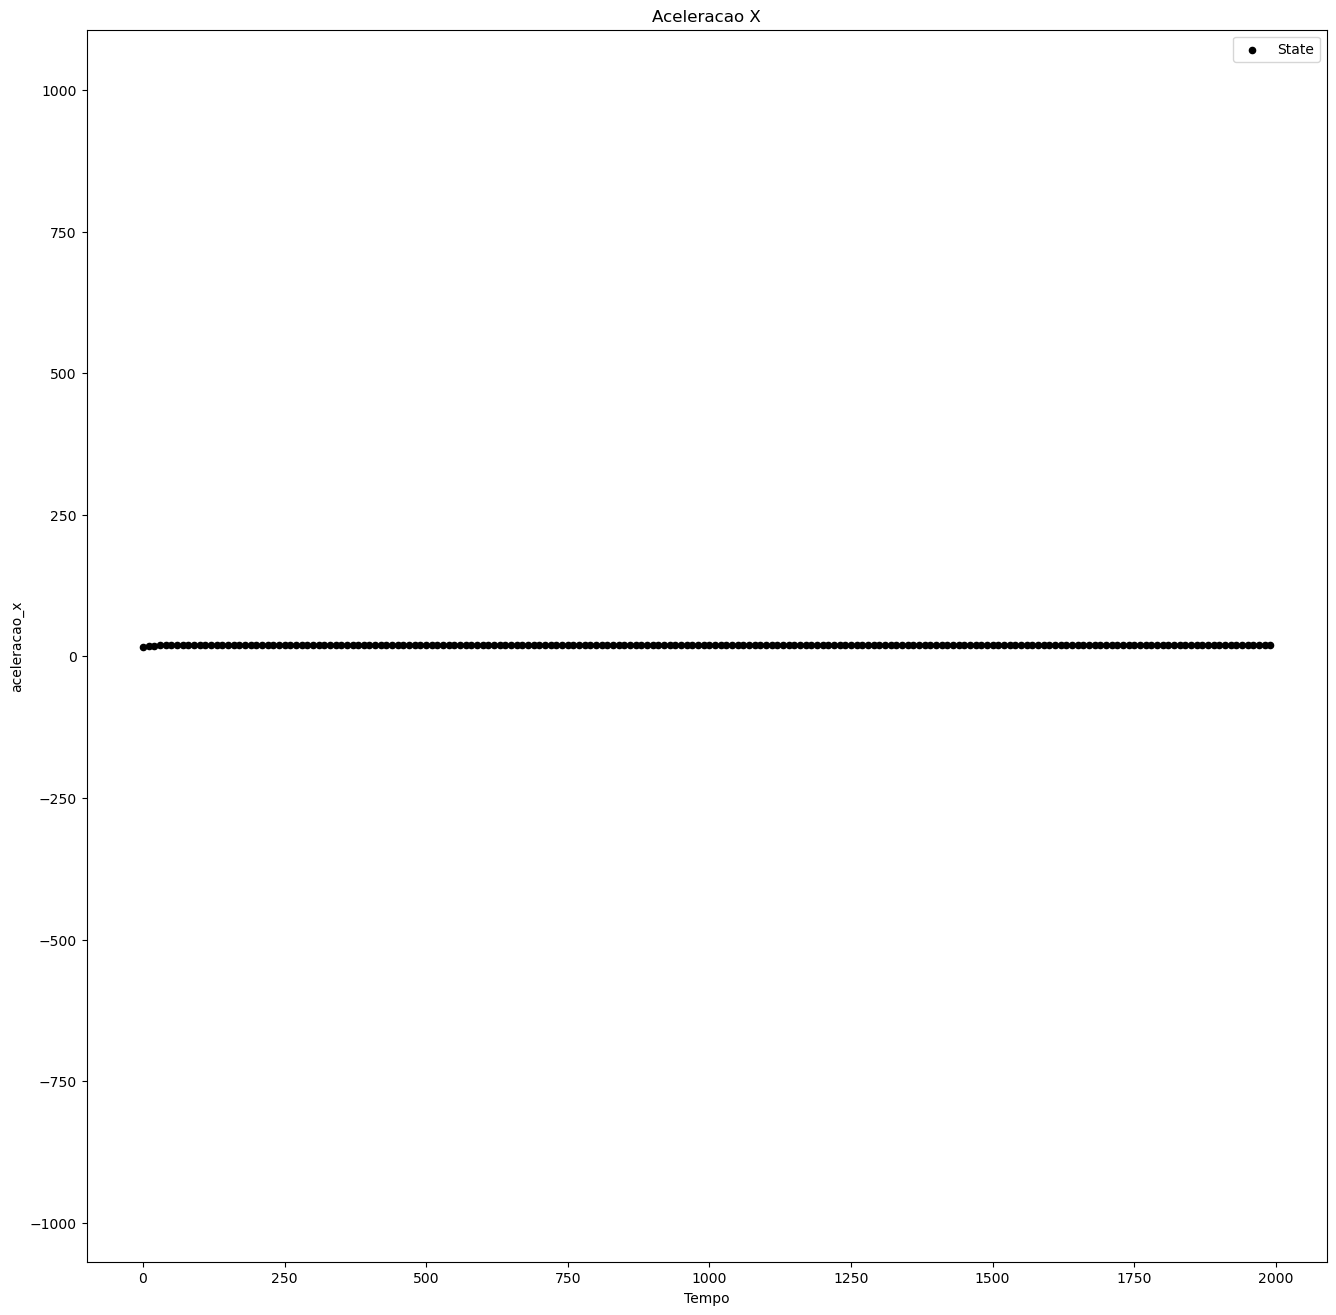

In [14]:
fig = plt.figure(figsize=(16,16))
plt.scatter(X_axis,aceleracao_x, s=20, label='State', c='k')

plt.xlabel('Tempo')
plt.ylabel('aceleracao_x')
plt.title('Aceleracao X')
plt.legend(loc='best')
plt.axis('equal')

(-99.5, 2089.5, 9.612934549747601, 11.007721719697143)

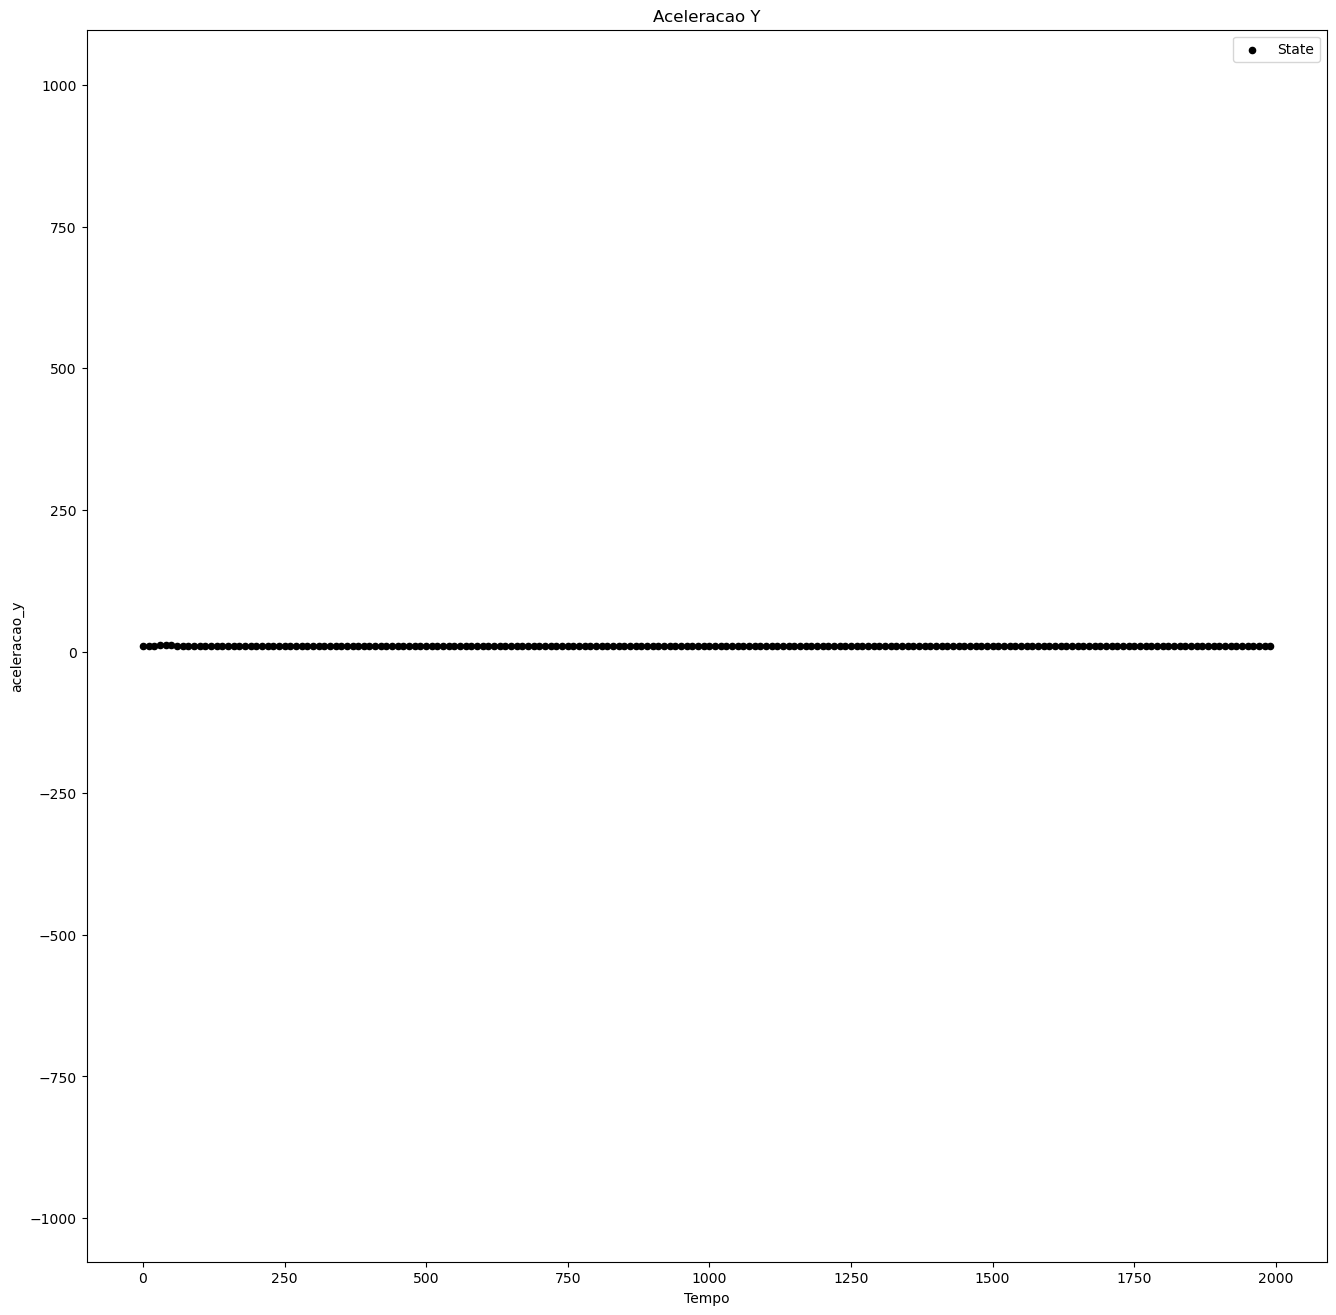

In [15]:
fig = plt.figure(figsize=(16,16))
plt.scatter(X_axis,aceleracao_y, s=20, label='State', c='k')

plt.xlabel('Tempo')
plt.ylabel('aceleracao_y')
plt.title('Aceleracao Y')
plt.legend(loc='best')
plt.axis('equal')

(-99.5, 2089.5, -18.162522064587034, 419.2220399283314)

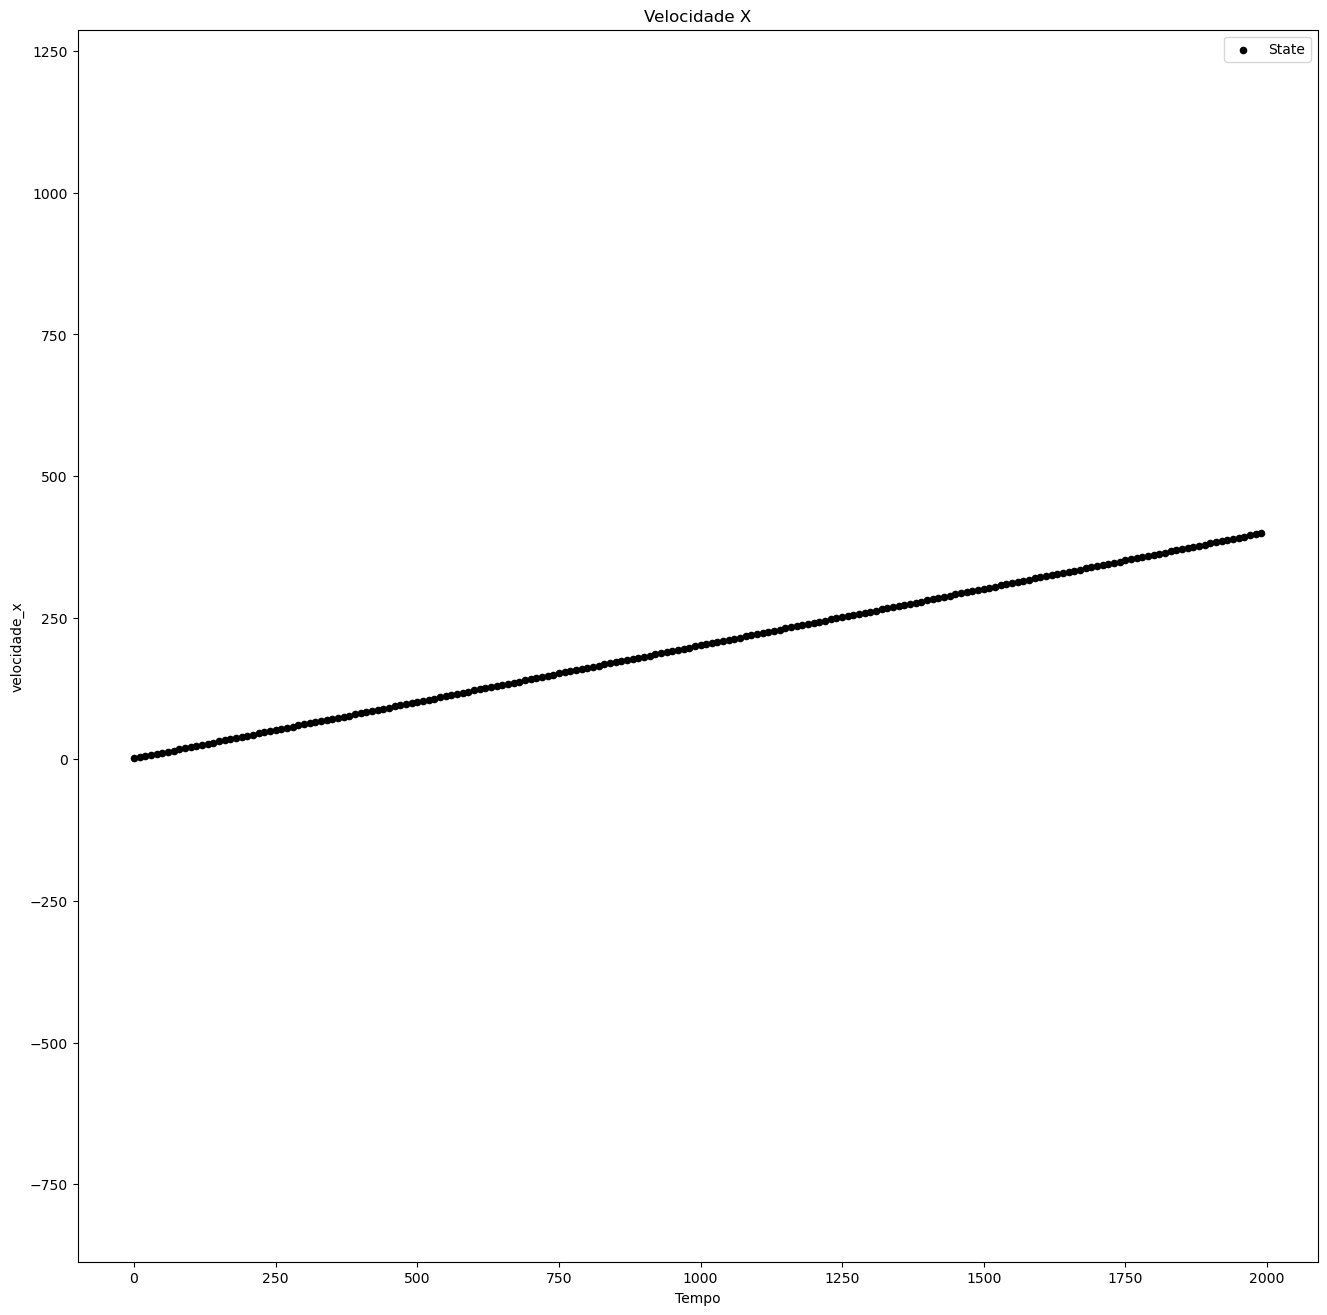

In [16]:
fig = plt.figure(figsize=(16,16))
plt.scatter(X_axis,velocidade_x, s=20, label='State', c='k')

plt.xlabel('Tempo')
plt.ylabel('velocidade_x')
plt.title('Velocidade X')
plt.legend(loc='best')
plt.axis('equal')

(-99.5, 2089.5, -9.0422647163471, 211.16725745960127)

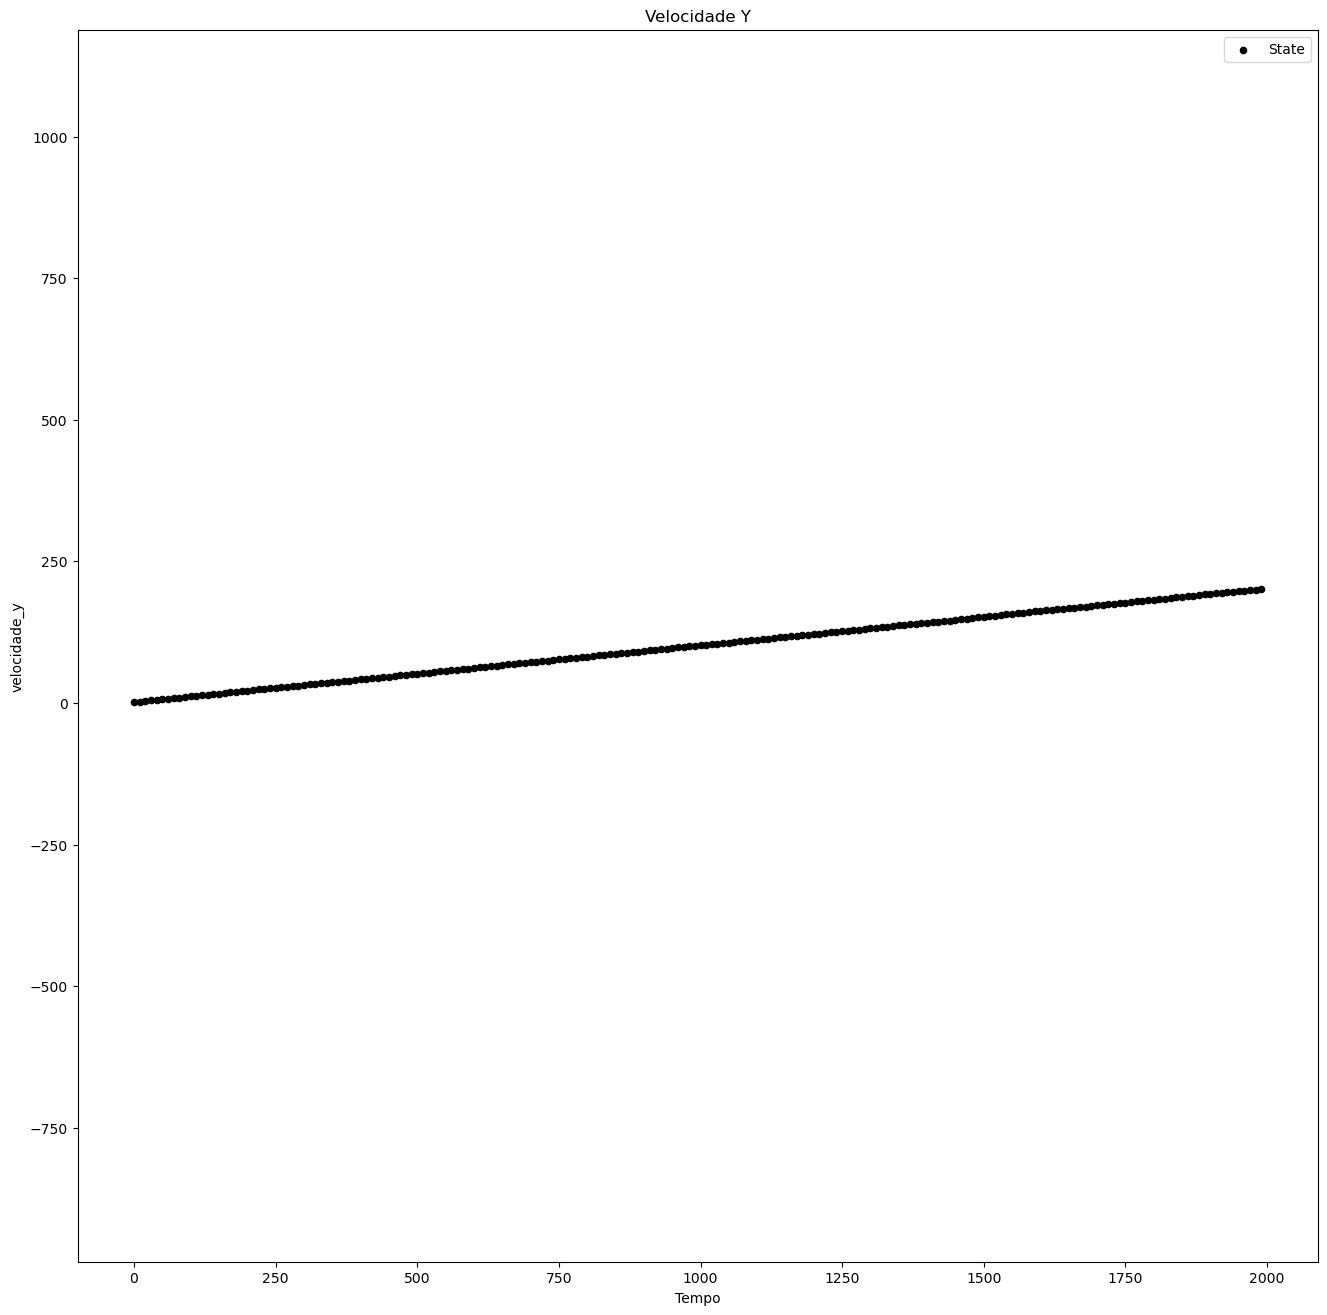

In [17]:
fig = plt.figure(figsize=(16,16))
plt.scatter(X_axis,velocidade_y, s=20, label='State', c='k')

plt.xlabel('Tempo')
plt.ylabel('velocidade_y')
plt.title('Velocidade Y')
plt.legend(loc='best')
plt.axis('equal')

(-99.5, 2089.5, -199.16762707779137, 4184.410378562083)

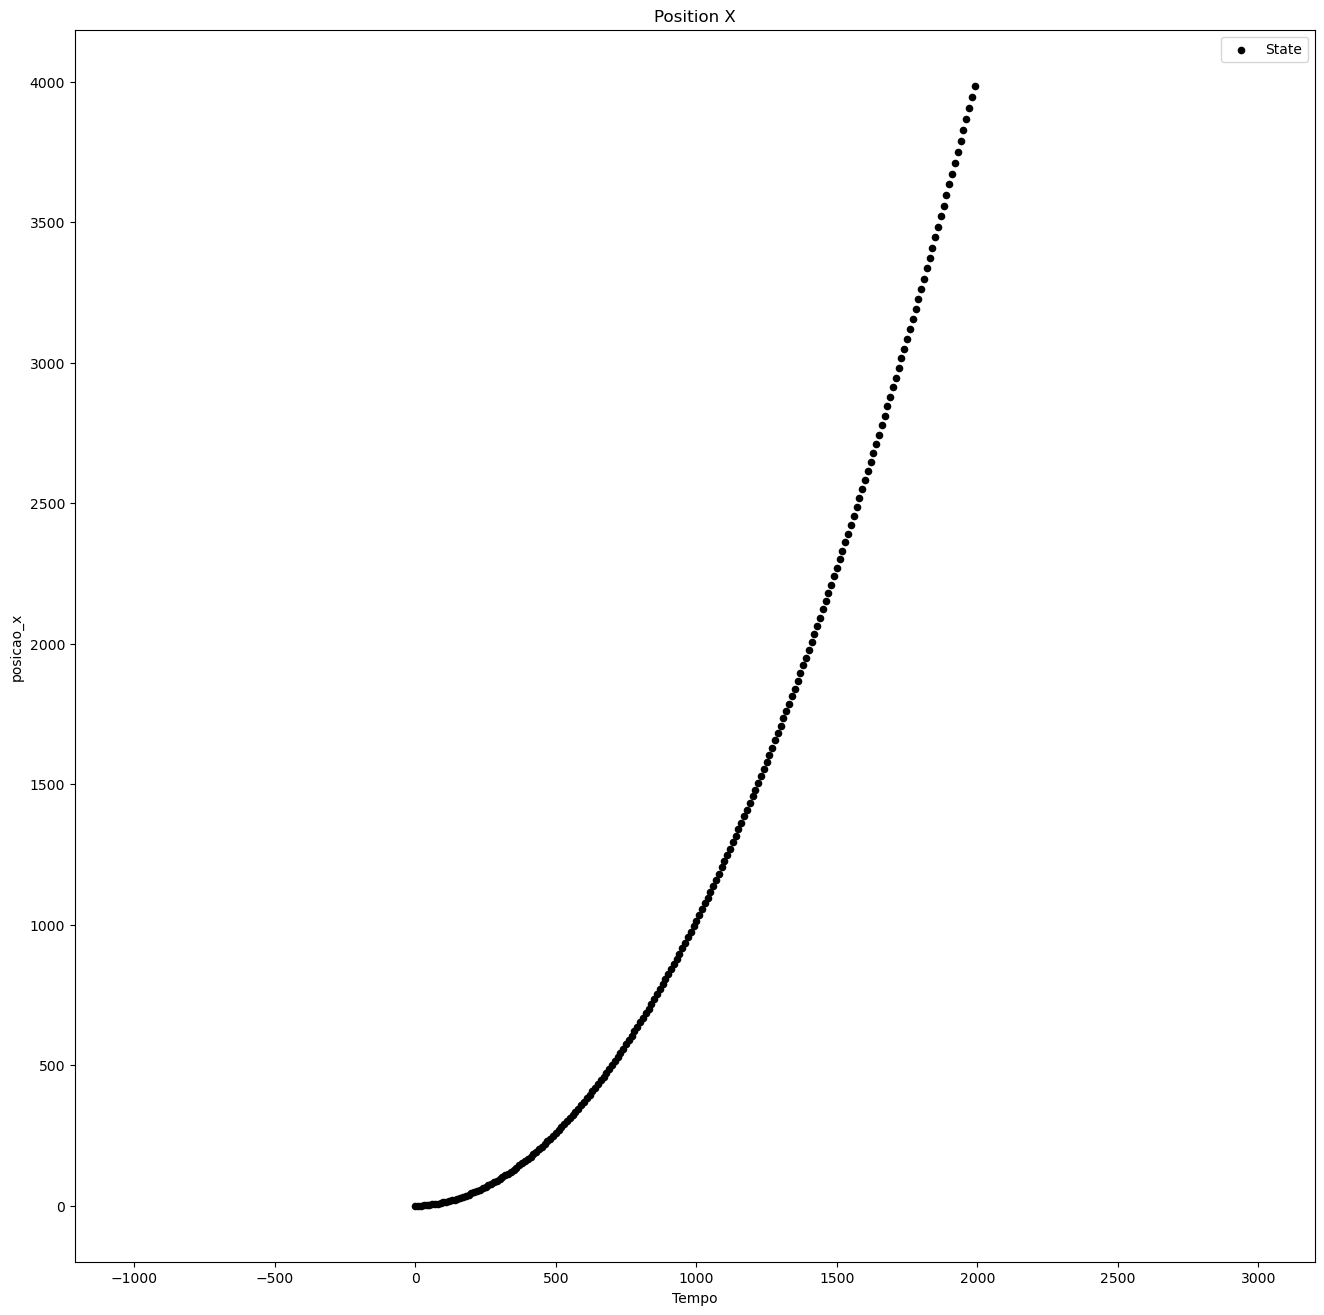

In [18]:
fig = plt.figure(figsize=(16,16))
plt.scatter(X_axis,posicao_x, s=20, label='State', c='k')

plt.xlabel('Tempo')
plt.ylabel('posicao_x')
plt.title('Position X')
plt.legend(loc='best')
plt.axis('equal')

(-99.5, 2089.5, -100.78576880585332, 2117.5649925719)

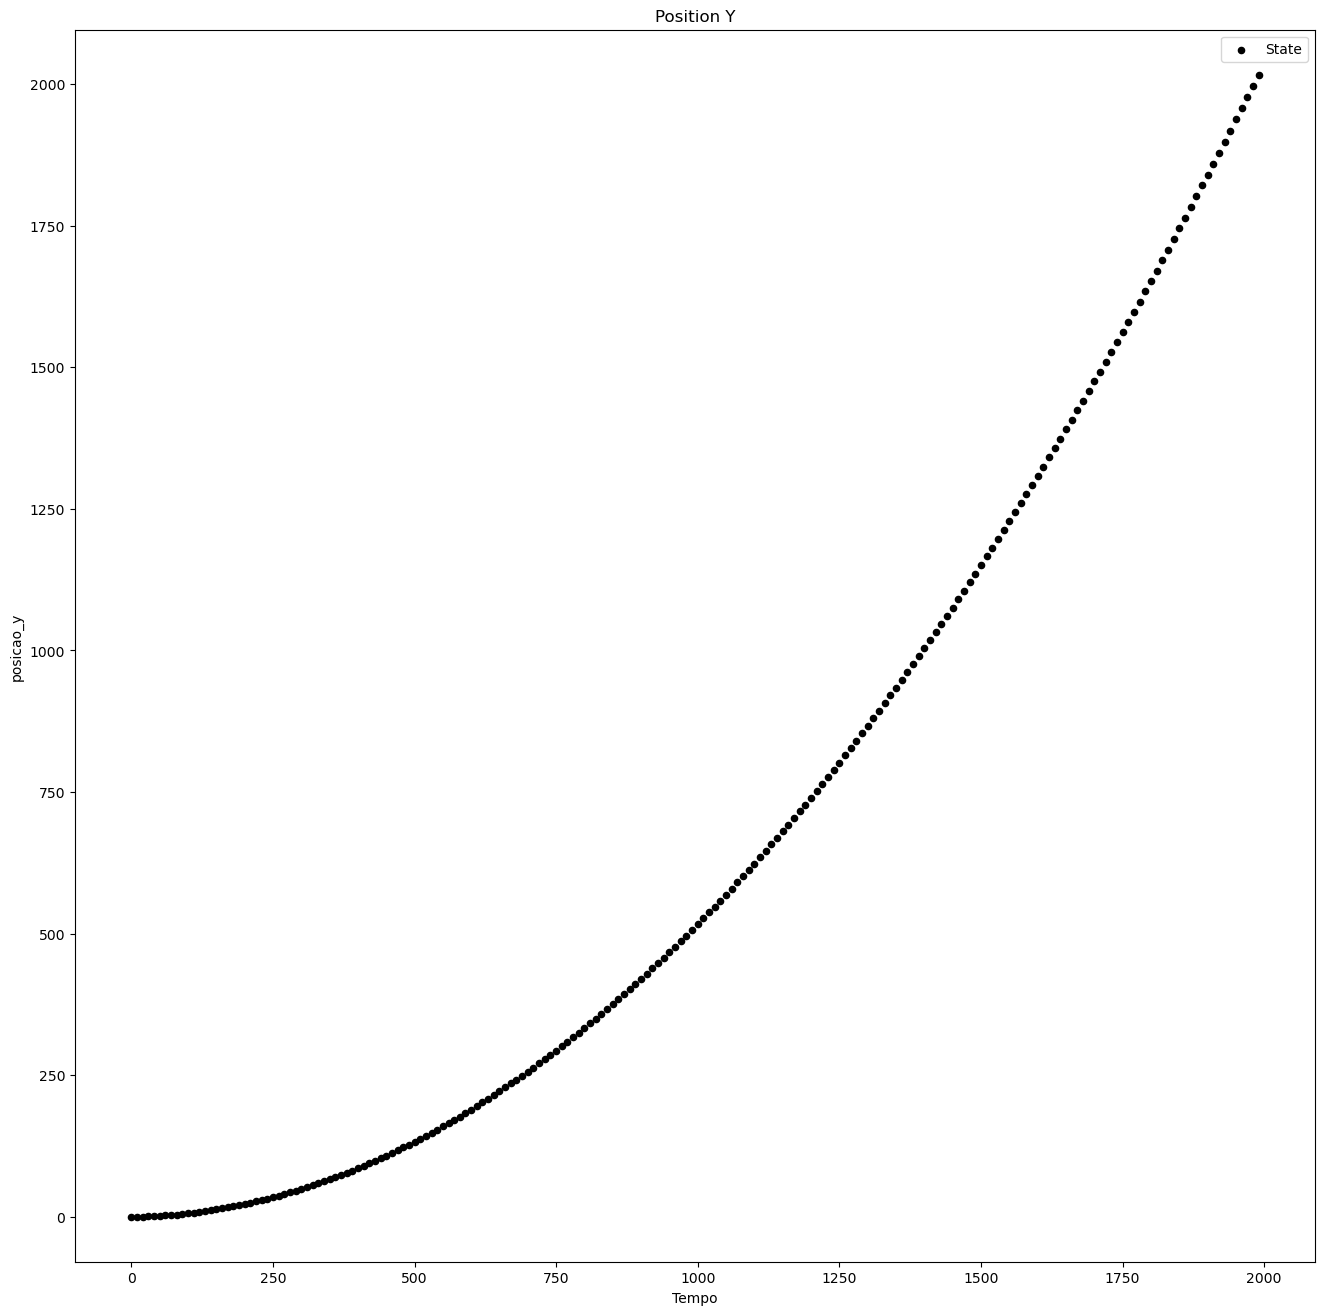

In [19]:
fig = plt.figure(figsize=(16,16))
plt.scatter(X_axis,posicao_y, s=20, label='State', c='k')

plt.xlabel('Tempo')
plt.ylabel('posicao_y')
plt.title('Position Y')
plt.legend(loc='best')
plt.axis('equal')